******

***RICE LEAF DISEASE PREDICTION PROJECT USING CNN AND DATA AUGUMENTATION***

In [ ]:
# parimal

*Agriculture is the main source of food in India. During the crop cycle, many plant diseases can occur and can affect the crop. Identification and classification of plant disease at the leaf level is a crucial part of crop management and is important in the early detection and diagnosis of plant diseases. Traditionally, the classification of plant diseases has been performed by farmers using manual methods like manual inspection or field observations. However, this process is time-consuming and error-prone, which is why there is a need for an intelligent system that can automatically classify images based on plant leaf diseases.*

**Bacterial leaf blight --> 40 images
Brown spot --> 40 images
Leaf smut --> 39 images**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# Need to be connect to google drive for loading dataset

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# importing most important deep learing libraries
from tensorflow.keras.models import Sequential # most imporant DL library
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import  array_to_img, img_to_array, load_img
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

import random
from sklearn import preprocessing
import tensorflow.keras as keras
from keras import regularizers

import tensorflow as tf
from tensorflow.keras.utils import to_categorical

import glob
import cv2
import os
import pathlib

In [3]:
# Set random seed for reproducibility
tf.random.set_seed(42)

In [4]:
# path of main folder in google drive link

In [5]:
data_dir ="/content/drive/MyDrive/Data"
data_dir = pathlib.Path(data_dir)

CLASS_NAMES = np.array(['Leaf Blight','Brown Spot','Leaf Smut'])

print('Class Names: ', CLASS_NAMES)

Class Names:  ['Leaf Blight' 'Brown Spot' 'Leaf Smut']


In [6]:
# Seperate train and test path
train_path = '/content/drive/MyDrive/Data'
test_path = '/content/drive/MyDrive/Data'

**2. Data Augumentation:**

In [68]:
# Define the parameters
BATCH_SIZE = 16
IMG_HEIGHT = 224
IMG_WIDTH = 224
num_classes = 3

In [8]:
# Data augmentation for training set
image_train_gen = ImageDataGenerator(rescale=1./255,
                                     zoom_range=0.50,
                                     rotation_range=45,
                                     horizontal_flip=True,
                                     width_shift_range=0.15,
                                     height_shift_range=0.15)

In [9]:
# Load and augment the training dataset
train_data_gen = image_train_gen.flow_from_directory(train_path,
                                                     shuffle=True,
                                                     batch_size=BATCH_SIZE,
                                                     target_size=(IMG_HEIGHT,IMG_WIDTH),
                                                     class_mode='categorical')


Found 119 images belonging to 3 classes.


*The ImageDataGenerator class has three methods flow(), flow_from_directory() and flow_from_dataframe() to read the images from a big numpy array and folders containing images.
Here we will use flow_from_directory() as we have multiple images in our training set from each sub directory/class.*

In [10]:
# Data normalization for test set (no augmentation)
img_val_gen = ImageDataGenerator(rescale=1./255) # test data
val_data_gen = img_val_gen.flow_from_directory(test_path,
                                               batch_size=BATCH_SIZE,
                                               target_size=(IMG_HEIGHT,IMG_WIDTH),
                                               class_mode='categorical')

Found 119 images belonging to 3 classes.


In [ ]:
def plotImages(image_arr):
    fig,axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img,ax in zip(image_arr,axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

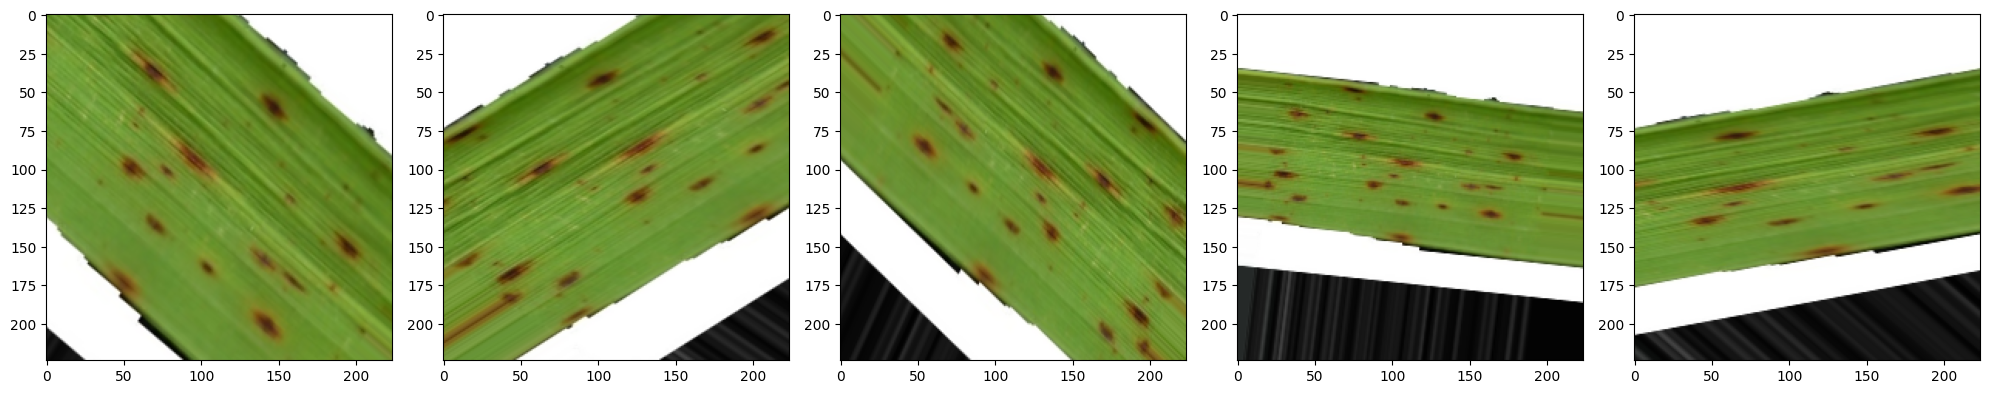

In [ ]:
# Plot a few training images-
img_array = [train_data_gen[0][0][0] for i in range(5)]
plotImages(img_array)

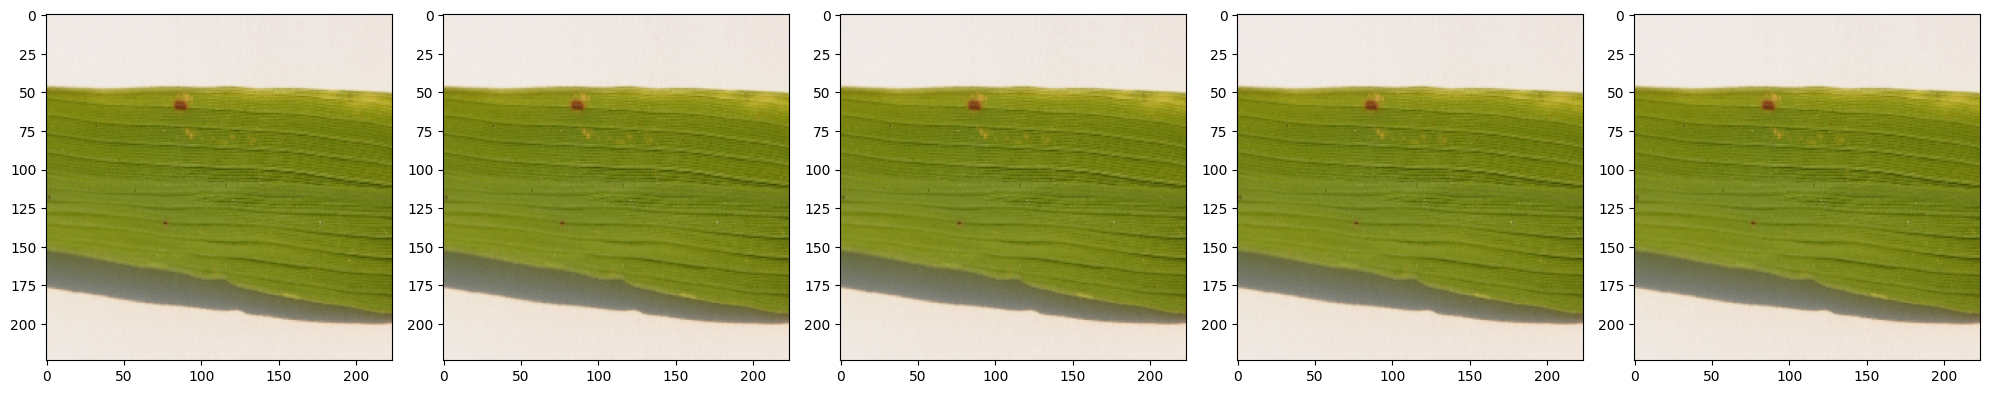

In [ ]:
# plot a few val/testing  images
img_array  = [val_data_gen[0][0][0] for i in range(5)]
plotImages(img_array)

**3.Model building**

In [11]:
# CNN :Model building
#Instatiating A convnet: CNN

model = Sequential()
model.add(Conv2D(16, (3,3), input_shape=(224,224,3), activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(32, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(3, activation="softmax"))

In [12]:
model.compile(
    optimizer = "adam",
    loss = "categorical_crossentropy",
    metrics = ['accuracy']
)
#This function prepares the model for training by specifying certain important settings
#that are necessary for the training process to work effectively.

In [13]:
from keras.optimizers import Adam

In [14]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 64)       0

***model.summary()is a function or method typically provided by various deep learning frameworks like TensorFlow and Keras. It's used to display a concise and organized summary of the architecture and parameters of a neural network model.***

In [ ]:
# Total params: 5,561,891 TRAING PARAMETERS ARE GENERATED

In [ ]:
EPOCHS=3
history = model.fit_generator(train_data_gen, epochs=EPOCHS, validation_data=val_data_gen)

<ipython-input-24-511f68dc7f00>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_data_gen, epochs=EPOCHS, validation_data=val_data_gen)


Epoch 1/2
8/8 [==============================] - 69s 8s/step - loss: 2.0008 - accuracy: 0.2941 - val_loss: 1.1044 - val_accuracy: 0.3277
Epoch 2/2
8/8 [==============================] - 4s 543ms/step - loss: 1.1485 - accuracy: 0.3193 - val_loss: 1.0909 - val_accuracy: 0.4958


In [ ]:
# ACCURACY is less  we have to apply more value of Epochs.


In [ ]:
EPOCHS=15
history = model.fit_generator(train_data_gen, epochs=EPOCHS, validation_data=val_data_gen)

<ipython-input-43-e3b79ad2518e>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_data_gen, epochs=EPOCHS, validation_data=val_data_gen)


Epoch 1/15
8/8 [==============================] - 5s 623ms/step - loss: 0.3628 - accuracy: 0.8487 - val_loss: 0.1882 - val_accuracy: 0.9328
Epoch 2/15
8/8 [==============================] - 4s 560ms/step - loss: 0.4032 - accuracy: 0.8235 - val_loss: 0.2505 - val_accuracy: 0.9244
Epoch 3/15
8/8 [==============================] - 6s 741ms/step - loss: 0.3384 - accuracy: 0.8655 - val_loss: 0.1836 - val_accuracy: 0.9328
Epoch 4/15
8/8 [==============================] - 4s 539ms/step - loss: 0.3339 - accuracy: 0.8739 - val_loss: 0.1839 - val_accuracy: 0.9328
Epoch 5/15
8/8 [==============================] - 4s 552ms/step - loss: 0.3056 - accuracy: 0.8908 - val_loss: 0.2363 - val_accuracy: 0.9076
Epoch 6/15
8/8 [==============================] - 6s 740ms/step - loss: 0.3571 - accuracy: 0.8403 - val_loss: 0.1755 - val_accuracy: 0.9496
Epoch 7/15
8/8 [==============================] - 5s 650ms/step - loss: 0.3204 - accuracy: 0.8739 - val_loss: 0.2304 - val_accuracy: 0.9496
Epoch 8/15
8/8 [====

***After checkin epoch 67 the accuracy get decreases upto 0.71 so choose epochs 67 ***
loss: 0.4924 - accuracy: 0.8487 - val_loss: 0.3235 - val_accuracy: 0.8992
\n actully afte 3 epoch we will get better acccuracy for test and traing dataset


**4.chek Evaluate the model***

In [ ]:
eval_loss, eval_accuracy = model.evaluate(val_data_gen)
print(f"Evaluation loss: {eval_loss:.4f}")
print(f"Evaluation accuracy: {eval_accuracy:.4f}")

8/8 [==============================] - 2s 181ms/step - loss: 0.1898 - accuracy: 0.9076
Evaluation loss: 0.1898
Evaluation accuracy: 0.9076


In [ ]:
# Plot training and validation graphs
acc = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
print("test/val accuracy:", val_accuracy )
print("traing accuracy:",acc)

test/val accuracy: [0.9327731132507324, 0.924369752407074, 0.9327731132507324, 0.9327731132507324, 0.9075630307197571, 0.9495798349380493, 0.9495798349380493, 0.9411764740943909, 0.924369752407074, 0.8991596698760986, 0.8907563090324402, 0.9495798349380493, 0.8991596698760986, 0.9579831957817078, 0.9075630307197571]
traing accuracy: [0.848739504814148, 0.8235294222831726, 0.8655462265014648, 0.8739495873451233, 0.8907563090324402, 0.8403361439704895, 0.8739495873451233, 0.848739504814148, 0.8571428656578064, 0.8151260614395142, 0.8655462265014648, 0.8403361439704895, 0.8739495873451233, 0.848739504814148, 0.8739495873451233]


In [ ]:
epochs_range = range(EPOCHS)

epochs_range

range(0, 15)

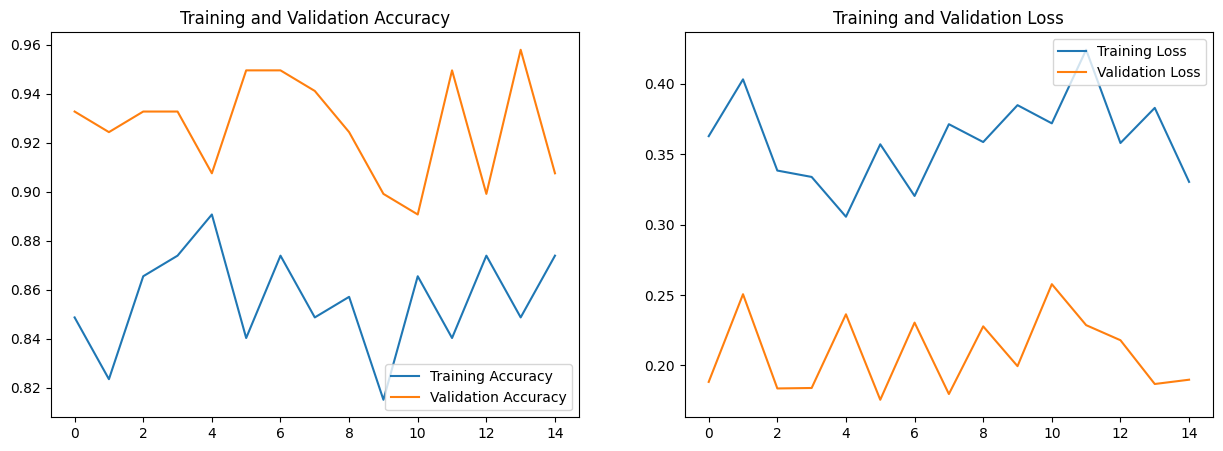

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Training Accuracy')
plt.plot(epochs_range,val_accuracy,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Training Loss')
plt.plot(epochs_range,val_loss,label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

***if we use more epochs more than 50 loss get reduced and accuracy also get increases***

In [19]:
EPOCHS=50
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(train_data_gen, epochs=EPOCHS, validation_data=val_data_gen,callbacks=[early_stopping])

Epoch 1/50
8/8 [==============================] - 5s 719ms/step - loss: 0.3797 - accuracy: 0.8487 - val_loss: 0.3783 - val_accuracy: 0.8235
Epoch 2/50
8/8 [==============================] - 6s 780ms/step - loss: 0.3989 - accuracy: 0.8235 - val_loss: 0.2598 - val_accuracy: 0.8824
Epoch 3/50
8/8 [==============================] - 5s 565ms/step - loss: 0.3711 - accuracy: 0.7983 - val_loss: 0.2661 - val_accuracy: 0.9076
Epoch 4/50
8/8 [==============================] - 6s 764ms/step - loss: 0.3756 - accuracy: 0.8487 - val_loss: 0.2438 - val_accuracy: 0.9076
Epoch 5/50
8/8 [==============================] - 4s 575ms/step - loss: 0.3570 - accuracy: 0.8571 - val_loss: 0.2495 - val_accuracy: 0.8739
Epoch 6/50
8/8 [==============================] - 4s 548ms/step - loss: 0.3939 - accuracy: 0.8151 - val_loss: 0.2861 - val_accuracy: 0.8908
Epoch 7/50
8/8 [==============================] - 6s 765ms/step - loss: 0.3747 - accuracy: 0.8403 - val_loss: 0.2787 - val_accuracy: 0.8571
Epoch 8/50
8/8 [====

***An epoch: represents one complete cycle through the entire training dataset, during which a neural network model learns and adjusts its parameters to improve its predictions.***

**Early stopping is a technique in deep learning that allows you to monitor a model's performance during training and stop the training process when the model's performance on a validation dataset stops improving, thus preventing overfitting**

**here when you set patience=5,patience=10 we canset  it means that if the validation loss does not improve for 5or 10 consecutive epochs, the training process will be stopped early.**

**model.fit() is used when the entire training dataset can fit into the memory and no data augmentation is applied.

*fit_generator* is used when we have a huge dataset to fit into our memory or when data augmentation needs to be applied.

So, you need to use fit_generator when using ImageDataGenerator**
** But in earlier Version of TensorFlow 2.x we can use .fit()method **

In [20]:
#loss: 0.3576 - accuracy: 0.8908 - val_loss: 0.2597 - val_accuracy: 0.8824

**After 50 epochs or we can run many times model.fit() it gives better results**

In [21]:
epochs_range = range(EPOCHS)

epochs_range

range(0, 50)

In [ ]:
# plot epoch= 100 accuracy ad loss :


In [22]:
# Plot training and validation graphs
acc = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [24]:
print("test/val accuracy:", val_accuracy )
print("training accuracy:",acc)

test/val accuracy: [0.8235294222831726, 0.8823529481887817, 0.9075630307197571, 0.9075630307197571, 0.8739495873451233, 0.8907563090324402, 0.8571428656578064, 0.831932783126831, 0.8907563090324402, 0.9159663915634155, 0.8991596698760986, 0.8403361439704895, 0.8991596698760986, 0.8823529481887817]
training accuracy: [0.848739504814148, 0.8235294222831726, 0.7983193397521973, 0.848739504814148, 0.8571428656578064, 0.8151260614395142, 0.8403361439704895, 0.8235294222831726, 0.8655462265014648, 0.8151260614395142, 0.848739504814148, 0.8235294222831726, 0.8235294222831726, 0.8907563090324402]


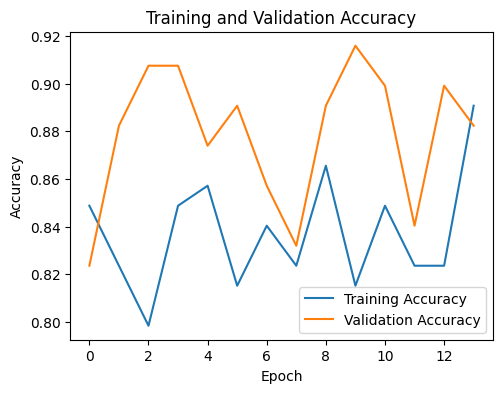

In [25]:
#plot training and testing accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

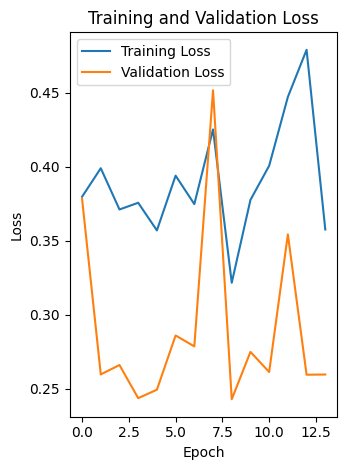

In [26]:
# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()







**5.SAVING DEEP LEARNING MODEL**

In [27]:
# Save the CNN  model
model.save('Rice leaf_CNN_model.h5')

print("CNN Model saved successfully.")

CNN Model saved successfully.


**#Use next IInd model =VGG**

In [51]:
from tensorflow.keras.applications import VGG16

In [52]:
# Create a VGG model with pre-trained weights (excluding the top layers)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

***VGG16: This is a pre-defined model architecture provided by Keras that follows the VGG (Visual Geometry Group) architecture. VGG is a popular convolutional neural network architecture known for its simplicity and effectiveness. It's widely used for image classification tasks.***
 **weights='imagenet'**: This argument specifies that you want to use the pre-trained weights from the ImageNet dataset. ImageNet is a large-scale dataset used for training deep learning models for image classification.

**include_top=False: This argument specifies that you don't want to include the top layers of the VGG model. The top layers of the VGG model are responsible for classification, but since you'll be adding your own classification layers, you exclude the top layers**

In [65]:
model_1 = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),

    Dense(3, activation='softmax') # this is  class=3 at output so choose value is 3
])
#first i use dense is 256 but after that i choose value =1024 for more deep model

In [66]:
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [67]:
EPOCHS=20
history1 = model_1.fit(train_data_gen, epochs=EPOCHS, validation_data=val_data_gen)


Epoch 1/20
8/8 [==============================] - 11s 780ms/step - loss: 1.0989 - accuracy: 0.3109 - val_loss: 1.0986 - val_accuracy: 0.3361
Epoch 2/20
8/8 [==============================] - 5s 618ms/step - loss: 1.0986 - accuracy: 0.3361 - val_loss: 1.0986 - val_accuracy: 0.3361
Epoch 3/20
8/8 [==============================] - 5s 615ms/step - loss: 1.0987 - accuracy: 0.3361 - val_loss: 1.0986 - val_accuracy: 0.3361
Epoch 4/20
8/8 [==============================] - 6s 750ms/step - loss: 1.0986 - accuracy: 0.3361 - val_loss: 1.0986 - val_accuracy: 0.3361
Epoch 5/20
8/8 [==============================] - 5s 602ms/step - loss: 1.0986 - accuracy: 0.3361 - val_loss: 1.0986 - val_accuracy: 0.3361
Epoch 6/20
8/8 [==============================] - 5s 689ms/step - loss: 1.0986 - accuracy: 0.3361 - val_loss: 1.0986 - val_accuracy: 0.3361
Epoch 7/20
8/8 [==============================] - 5s 591ms/step - loss: 1.0987 - accuracy: 0.3361 - val_loss: 1.0986 - val_accuracy: 0.3361
Epoch 8/20
8/8 [===

**loss: 1.0989 - accuracy: 0.3361 - val_loss: 1.0986 - val_accuracy: 0.3361 this is for epoch =20** ***So increases the value of epochs with early stopping or changing dense layers*** accuracy is very less

In [69]:
EPOCHS=50

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history1 = model_1.fit(train_data_gen, epochs=EPOCHS, validation_data=val_data_gen)

Epoch 1/50
8/8 [==============================] - 6s 802ms/step - loss: 1.0987 - accuracy: 0.3361 - val_loss: 1.0986 - val_accuracy: 0.3361
Epoch 2/50
8/8 [==============================] - 5s 654ms/step - loss: 1.0986 - accuracy: 0.3361 - val_loss: 1.0986 - val_accuracy: 0.3361
Epoch 3/50
8/8 [==============================] - 6s 734ms/step - loss: 1.0986 - accuracy: 0.3361 - val_loss: 1.0986 - val_accuracy: 0.3361
Epoch 4/50
8/8 [==============================] - 5s 584ms/step - loss: 1.0986 - accuracy: 0.3361 - val_loss: 1.0986 - val_accuracy: 0.3361
Epoch 5/50
8/8 [==============================] - 6s 764ms/step - loss: 1.0986 - accuracy: 0.3361 - val_loss: 1.0986 - val_accuracy: 0.3361
Epoch 6/50
8/8 [==============================] - 5s 615ms/step - loss: 1.0986 - accuracy: 0.3361 - val_loss: 1.0986 - val_accuracy: 0.3361
Epoch 7/50
8/8 [==============================] - 6s 736ms/step - loss: 1.0986 - accuracy: 0.3361 - val_loss: 1.0986 - val_accuracy: 0.3361
Epoch 8/50
8/8 [====

***After epoch=50 not imprving model i will check epochs=100 or changing the learning rate optimizer=Adam(learning_rate=0.0001)***

In [71]:
from tensorflow.keras.optimizers import Adam
model_1.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [72]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [74]:
EPOCHS=100

history_v = model_1.fit(train_data_gen, epochs=EPOCHS, validation_data=val_data_gen)

Epoch 1/100
8/8 [==============================] - 8s 1s/step - loss: 1.0985 - accuracy: 0.3361 - val_loss: 1.0985 - val_accuracy: 0.3361
Epoch 2/100
8/8 [==============================] - 5s 594ms/step - loss: 1.0985 - accuracy: 0.3361 - val_loss: 1.0985 - val_accuracy: 0.3361
Epoch 3/100
8/8 [==============================] - 9s 1s/step - loss: 1.0985 - accuracy: 0.3361 - val_loss: 1.0985 - val_accuracy: 0.3361
Epoch 4/100
8/8 [==============================] - 7s 852ms/step - loss: 1.0985 - accuracy: 0.3361 - val_loss: 1.0985 - val_accuracy: 0.3361
Epoch 5/100
8/8 [==============================] - 9s 1s/step - loss: 1.0985 - accuracy: 0.3361 - val_loss: 1.0985 - val_accuracy: 0.3361
Epoch 6/100
8/8 [==============================] - 5s 593ms/step - loss: 1.0985 - accuracy: 0.3361 - val_loss: 1.0985 - val_accuracy: 0.3361
Epoch 7/100
8/8 [==============================] - 6s 701ms/step - loss: 1.0985 - accuracy: 0.3361 - val_loss: 1.0985 - val_accuracy: 0.3361
Epoch 8/100
8/8 [=====

*Epoch 100/100
8/8 [==============================] - 6s 823ms/step - loss: 1.0985 - accuracy: 0.3361 - val_loss: 1.0985 - val_accuracy: 0.3361*

***This above VGG MODEL NOT GIVING training as well as testing accuracy and loss are constant so in future make better VGG MODEL*** *we will change in batch size ,Learning Rate Reduction:  adding the ReduceLROnPlateau callback, which reduces the learning rate if the validation loss plateaus. This can help the model to fine-tune more effectively.If your dataset is very small, it might be challenging to achieve high accuracy.*

In [75]:
epochs_range = range(EPOCHS)

epochs_range

range(0, 100)

In [76]:
# Plot training and validation graphs
acc1 = history_v.history['accuracy']
val_accuracy1 = history_v.history['val_accuracy']

loss1 = history_v.history['loss']
val_loss1 = history_v.history['val_loss']

In [77]:
print("test/val accuracy of VGG16:", val_accuracy1 )
print("traing accuracyOf VGG16:",acc1)

test/val accuracy of VGG16: [0.3361344635486603, 0.3361344635486603, 0.3361344635486603, 0.3361344635486603, 0.3361344635486603, 0.3361344635486603, 0.3361344635486603, 0.3361344635486603, 0.3361344635486603, 0.3361344635486603, 0.3361344635486603, 0.3361344635486603, 0.3361344635486603, 0.3361344635486603, 0.3361344635486603, 0.3361344635486603, 0.3361344635486603, 0.3361344635486603, 0.3361344635486603, 0.3361344635486603, 0.3361344635486603, 0.3361344635486603, 0.3361344635486603, 0.3361344635486603, 0.3361344635486603, 0.3361344635486603, 0.3361344635486603, 0.3361344635486603, 0.3361344635486603, 0.3361344635486603, 0.3361344635486603, 0.3361344635486603, 0.3361344635486603, 0.3361344635486603, 0.3361344635486603, 0.3361344635486603, 0.3361344635486603, 0.3361344635486603, 0.3361344635486603, 0.3361344635486603, 0.3361344635486603, 0.3361344635486603, 0.3361344635486603, 0.3361344635486603, 0.3361344635486603, 0.3361344635486603, 0.3361344635486603, 0.3361344635486603, 0.336134463

In [ ]:
#Plot traing and trsting accuracy and loss:

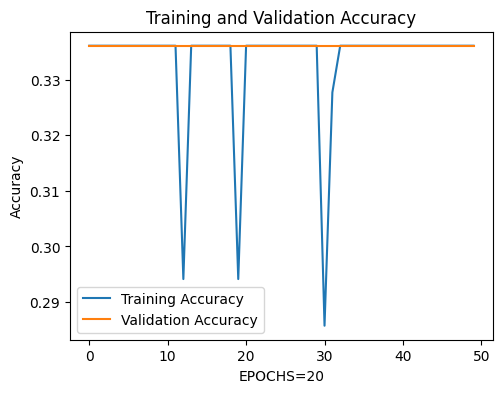

In [78]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
#plt.xlabel('epochs_range')
plt.xlabel('EPOCHS=20')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

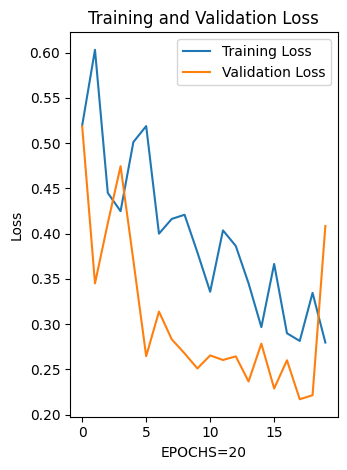

In [ ]:
 #Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.xlabel('EPOCHS=20')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [79]:
# Save the VGG16 model
model1.save('rice_leaf_disease_vgg_model.h5')

print(" VGG16 Model saved successfully.")

 VGG16 Model saved successfully.


**III. CREATE inception v3 model**

***To use InceptionV3 or any pre-trained model, you typically remove the fully connected layers and add your own layers suited to your specific task, followed by fine-tuning on your dataset***

In [80]:
from tensorflow.keras.applications import  InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

In [81]:
# Create InceptionV3 model
base_model2 = InceptionV3(weights='imagenet', include_top=False)
x = base_model2.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)
from tensorflow.keras.models import Model
#This import statement allows you to use the Model class from the TensorFlow Keras library.
#The Model class is used to create a Keras model by specifying the inputs and outputs of the model. In the code snippet I provided, it's used to create the complete model by specifying the input from the base model and the output from the custom layers you added on top of the base model.

inception_model = Model(inputs=base_model2.input, outputs=predictions)

87910968/87910968 [==============================] - 0s 0us/step


In [82]:
# Compile InceptionV3 model
inception_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [83]:
# Train InceptionV3 model
EPOCHS=50
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history2 = inception_model.fit_generator(train_data_gen, epochs=EPOCHS, validation_data=val_data_gen, callbacks=[early_stopping])



<ipython-input-83-ca3f86366b85>:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history2 = inception_model.fit_generator(train_data_gen, epochs=EPOCHS, validation_data=val_data_gen, callbacks=[early_stopping])


Epoch 1/50
8/8 [==============================] - 57s 2s/step - loss: 1.4423 - accuracy: 0.5126 - val_loss: 1.9026 - val_accuracy: 0.3613
Epoch 2/50
8/8 [==============================] - 6s 829ms/step - loss: 0.6734 - accuracy: 0.6807 - val_loss: 3.4948 - val_accuracy: 0.3866
Epoch 3/50
8/8 [==============================] - 5s 653ms/step - loss: 0.7456 - accuracy: 0.7731 - val_loss: 7.6593 - val_accuracy: 0.3697
Epoch 4/50
8/8 [==============================] - 6s 740ms/step - loss: 0.6135 - accuracy: 0.7731 - val_loss: 25.7582 - val_accuracy: 0.3361
Epoch 5/50
8/8 [==============================] - 5s 654ms/step - loss: 0.6556 - accuracy: 0.7899 - val_loss: 91.9872 - val_accuracy: 0.3277
Epoch 6/50
8/8 [==============================] - 8s 1s/step - loss: 0.3260 - accuracy: 0.8824 - val_loss: 39.6205 - val_accuracy: 0.3277


**Using inception v3 model traing accuracy is very high of differnt epochssuch as 20,50 but testing accuracy is very low so it is overfitting the model**so we refer normal CNN model for further use

In [ ]:
# Save the inception_model trained model
inception_model.save(' rice_leaf_disease_inceptv3_model.h5')

print(" inceptionv3 Model saved successfully.")

 inceptionv3 Model saved successfully.


**Conclusions:**
*Using inception v3 model traing accuracy isvery high of differnt epochs such as20,50 but testing accuracy si very low so it is overfitting the modelso we refer normalCNN mdel and VGG 16 model for future use*

***6.Hyperparamter Tuning***

In [ ]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 4.6 MB/s eta 0:00:00


In [ ]:
from kerastuner.tuners import RandomSearch

*Save the Trained Model: Before hyperparameter tuning, make sure you save the trained CNN model using the model.save() method. This way, you can reload the trained model later and fine-tune it with different hyperparameters*

In [ ]:

from tensorflow.keras.models import load_model

# Load the trained model
trained_model1 = load_model('/content/cnn_model.h5')

# Define the hyperparameters to tune
new_learning_rate = 0.001,0.01
new_batch_size = 32
new_dropout_rate = 0.2,0.3


In [ ]:
# Modify the hyperparameters of the CNN loaded model
trained_model1.optimizer.learning_rate = new_learning_rate

In [ ]:
#history2 = inception_model.fit_generator(train_data_gen, epochs=EPOCHS, validation_data=val_data_gen, callbacks=[early_stopping])

In [ ]:
# Compile the model with new hyperparameters
trained_model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with the new hyperparameters
history_hp = trained_model1.fit(
    train_data_gen,
    epochs=10,  # Update as needed
    validation_data=val_data_gen
)

Epoch 1/10
8/8 [==============================] - 7s 605ms/step - loss: 0.4438 - accuracy: 0.8235 - val_loss: 0.3063 - val_accuracy: 0.8739
Epoch 2/10
8/8 [==============================] - 5s 687ms/step - loss: 0.3976 - accuracy: 0.8487 - val_loss: 0.3201 - val_accuracy: 0.8487
Epoch 3/10
8/8 [==============================] - 4s 576ms/step - loss: 0.5225 - accuracy: 0.8235 - val_loss: 0.4392 - val_accuracy: 0.7899
Epoch 4/10
8/8 [==============================] - 7s 874ms/step - loss: 0.5427 - accuracy: 0.7815 - val_loss: 0.3271 - val_accuracy: 0.8655
Epoch 5/10
8/8 [==============================] - 5s 598ms/step - loss: 0.4084 - accuracy: 0.8067 - val_loss: 0.3260 - val_accuracy: 0.8655
Epoch 6/10
8/8 [==============================] - 5s 714ms/step - loss: 0.3773 - accuracy: 0.8403 - val_loss: 0.3008 - val_accuracy: 0.8739
Epoch 7/10
8/8 [==============================] - 4s 567ms/step - loss: 0.3719 - accuracy: 0.8487 - val_loss: 0.2798 - val_accuracy: 0.8992
Epoch 8/10
8/8 [====

***After hyper parameter tuning accuracy and loss is very effective Only using epoch =10 ***
loss: 0.3562 - accuracy: 0.8487 - val_loss: 0.2240 - val_accuracy: 0.9160


**Prediction of images**

In [ ]:

from tensorflow.keras.preprocessing.image import img_to_array, load_img


# Load the trained model
model_pred = tf.keras.models.load_model('/content/cnn_model.h5') # Replace with your model file



In [ ]:
# Load and preprocess the images for prediction
def preprocess_image(image_path, target_size):
    image = load_img(image_path, target_size=target_size)
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    image = image / 255.0 # Normalize pixel values
    return image

path_1='/content/drive/MyDrive/Data/Bacterial leaf blight-20200814T055237Z-001/Bacterial leaf blight/DSC_0365.JPG'
image_path_1 = path_1 # Replace with your image path
path_2='/content/drive/MyDrive/Data/Brown spot-20200814T055208Z-001/Brown spot/DSC_0100.jpg'
image_path_2 = path_2 # Replace with your image path
target_size = (224, 224) # Match your model's input dimensions



In [ ]:
image_1 = preprocess_image(image_path_1, target_size)
image_2 = preprocess_image(image_path_2, target_size)


In [ ]:
# Make predictions of cnn model :model function use
predictions_1 = model.predict(image_1)
predictions_2 = model.predict(image_2)

# Interpret predictions
predicted_class_1 = np.argmax(predictions_1[0])
predicted_class_2 = np.argmax(predictions_2[0])

print(predictions_1)


1/1 [==============================] - 0s 22ms/step
[[0.9289122  0.07002787 0.00105979]]


In [ ]:
print(predicted_class_1)

0


In [ ]:
# Print the predicted classes
#check class1 and class 2 categories
print(f"Predicted class for image 1: {predicted_class_1}")
print(f"Predicted class for image 2: {predicted_class_2}")

Predicted class for image 1: 0
Predicted class for image 2: 1


***Our CNN model predict class1 and class2 images correctly***

In [ ]:
from PIL import Image

1/1 [==============================] - 0s 82ms/step


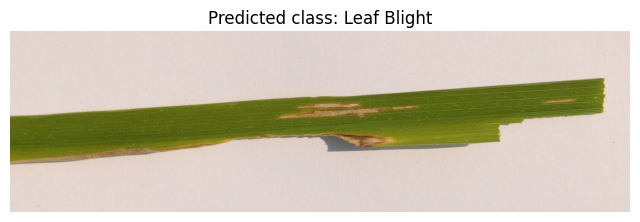

Predicted class for /content/drive/MyDrive/Data/Bacterial leaf blight-20200814T055237Z-001/Bacterial leaf blight/DSC_0365.JPG: Leaf Blight
1/1 [==============================] - 0s 28ms/step


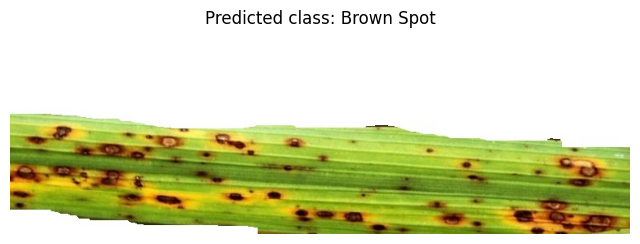

Predicted class for /content/drive/MyDrive/Data/Brown spot-20200814T055208Z-001/Brown spot/DSC_0100.jpg: Brown Spot


In [ ]:
# Load and display the original images along with predicted class
for image_path in [image_path_1, image_path_2]:
    # Preprocess the image
    image = preprocess_image(image_path, target_size)

    # Make predictions for class1 andclass2
    predictions = model.predict(image)
    predicted_class = np.argmax(predictions[0])
    predicted_class_name = CLASS_NAMES[predicted_class]  # Assuming you have class names defined

    # Load the original image using PIL
    original_image = Image.open(image_path)# already given
    #The original image is loaded using the Image.open function from the PIL library.

    # Display the original image and the predicted class
    plt.figure(figsize=(8, 8))
    plt.imshow(original_image)
    plt.title(f"Predicted class: {predicted_class_name}")
    plt.axis('off')
    plt.show()

    # Print the predicted class
    print(f"Predicted class for {image_path}: {predicted_class_name}")


*predictions[0] extracts the predicted probabilities for the classes from the predictions array for the single image being predicted. The np.argmax() function then finds the index of the highest probability, which corresponds to the predicted class.*

**6.conclusions:**
*Three different classifications of rice leaf diseases were studied and compared using the convolutional neural network. Using more than 119 images with data augumenteion as training data we were able to identify what type of disease a leaf has with 88.2% accuracy. Diving deeper, we can accurately classify acauracy and loss.at epoch =15
Epoch 14/50
8/8 [==============================] - 4s 545ms/step - loss: 0.3576 - accuracy: 0.8908 - val_loss: 0.2597 - val_accuracy: 0.8824
*Using inception v3 model traing accuracy is very high of differnt epochs such as 20,50 but testing accuracy is very low so it is overfitting the modelso we refer normal lCNN model  for future use *We can be use different epochs value to learn model effectively.
```
Also use different CNN architectue for futute use
CNN Modelat after epoch 15 a gives best traing and testing accuracy and less loss but inception v3 and vgg 16 not giving good results
```
For future studies, we recommend to improve the accuracy of prediction by exploring other network architecture or adding layers or nodes to the current model, scale the project to other diseases for the model to be more general, and, lastly, consult with farmers and consider their input into the pre-processing and deployment of the model.*

**This 4th Capstone project -RICE LEAF DISEASE CLASSIFICATION USING CNN & DATA AUGUMENTATION **